In [1]:
import pandas as pd
import numpy as np
import scipy.optimize as op
import math
import matplotlib.pyplot as plt
from plotData import *

In [2]:
def plotData(data):

    cancela=data[data["is_churned"]==1]
    nocancela=data[data["is_churned"]==0]

    plt.scatter(x=cancela["ads_listened_per_week"], y=cancela["age"], c="blue", marker="+", label="Cancela")
    plt.scatter(x=nocancela["ads_listened_per_week"], y=nocancela["age"],c="yellow", marker=".", label="No Cancela")

    plt.xlabel("Anuncios por semana")
    plt.ylabel("Edad")
    plt.legend()
    plt.show()

def sigmoide(z):
    g=1/(1+np.exp(-z))
    return g

def coste(theta, X, y):
    m = len(y)
    J = 0
    h = sigmoide(np.dot(X,theta))
    J = (-1/m) * np.sum(np.multiply(y,np.log(h))+np.multiply(1-y,np.log(1-h)), axis=0)
    return J#.item()

def gradiente(theta, X, y):
    m = len(y)
    J = 0
    grad = np.zeros((len(theta)))
    h = sigmoide(np.dot(X,theta))
    grad = (1/m) * np.dot(X.T,(h-y))
    return grad

In [3]:
spotify_file_path = 'spotify_churn_dataset.csv'
spotify_data = pd.read_csv(spotify_file_path, nrows=80) #80 lineas para pruebas
#spotify_data.columns

#X = pd.DataFrame({"variable": spotify_data["subscription_type"]}) #evaluamos tipo subscripcion, parece más útil
#Y = pd.DataFrame({"cancela": spotify_data["is_churned"]}) #evaluamos si cancela o no

X=pd.DataFrame({"v1":spotify_data["ads_listened_per_week"],"v2":spotify_data["age"]})
Y=pd.DataFrame({"cancela":spotify_data["is_churned"]})

#plotData(X,Y)
#plt.plot(spotify_data['age'], spotify_data['is_churned'])

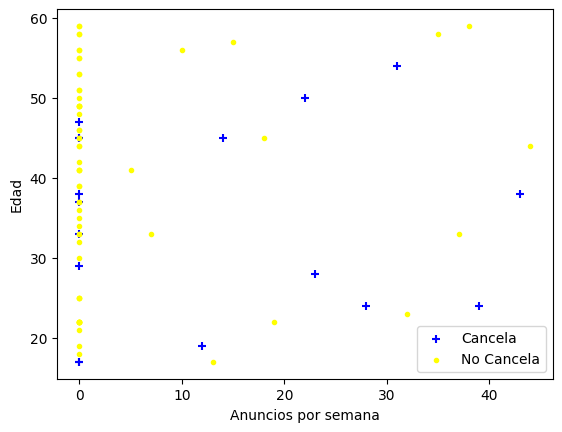

In [4]:
plotData(spotify_data)

In [5]:
#saco numero defilas y columnas
m, n = X.shape
# Add intercept term to x and X_test: columna de unos y columna
ones=np.ones((len(X),1)) #ones=np.ones([m,1])
X.insert(0,"unos", ones) #que pongo, el nombre, a que variable lo engancho

# Initialize fitting parameters
initial_thetas = np.zeros((n+1,1))#porque hay 3 columnas: notas1,notas2, los unos que acabo de crear

In [6]:
# Compute and display initial cost and gradient
vcoste=coste(initial_thetas, X, Y)
vgradiente=gradiente(initial_thetas, X, Y)

print("Coste Inicial con THETA 0: ",vcoste)
print("Gradiente Inicial con THETA 0: ",vgradiente)

#print(X)
#print(Y)

Coste Inicial con THETA 0:  cancela    0.693147
dtype: float64
Gradiente Inicial con THETA 0:  [[ 0.2875 ]
 [ 0.38125]
 [12.13125]]


In [7]:
print(type(coste), type(gradiente))
print(type(X), type(Y))

<class 'function'> <class 'function'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [8]:
params= op.fmin_cg(maxiter=20,f=coste,x0=initial_thetas.flatten(), fprime=gradiente, args=(X,Y.to_numpy().flatten()))

print(params)

         Current function value: 0.468846
         Iterations: 20
         Function evaluations: 45
         Gradient evaluations: 45
[-0.01998258  0.04735554 -0.04378624]


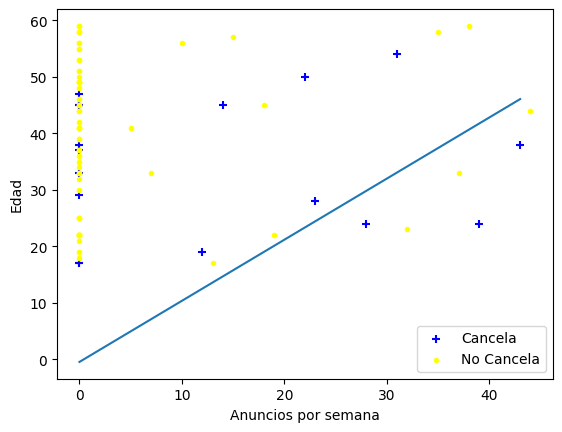

In [27]:
def plotDecisionBoundary(data, theta, X, Y):
    cancela=data[data["is_churned"]==1]
    nocancela=data[data["is_churned"]==0]

    plt.scatter(x=cancela["ads_listened_per_week"], y=cancela["age"], c="blue", marker="+", label="Cancela")
    plt.scatter(x=nocancela["ads_listened_per_week"], y=nocancela["age"],c="yellow", marker=".", label="No Cancela")

    plt.xlabel("Anuncios por semana")
    plt.ylabel("Edad")

    xvalues=[min(cancela["ads_listened_per_week"]),max(cancela["ads_listened_per_week"])]
    yvalues=-(theta[0]+np.dot(theta[1],xvalues))/theta[2]

    plt.plot(xvalues,yvalues)
    
    plt.legend()
    plt.show()   

plotDecisionBoundary(spotify_data,params,X,Y)


In [23]:
# threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
def predict(theta, X_train, bool_round):

    if bool_round:

            pred= np.round(sigmoide(np.dot(X_train,theta)))
    else:
            pred=sigmoide(np.dot(X_train,theta))

    return pred

In [28]:
cancela1=predict(params, np.array([[1,45,85]]), bool_round=False) #columna de unos, anuncios,edad
print("Valor de prediccion: ", cancela1)

cancela2=predict(params, np.array([[1,45,45]]), bool_round=False) #columna de unos, anuncios,edad
print("Valor de prediccion: ", cancela2)

Valor de prediccion:  [0.16647569]
Valor de prediccion:  [0.53510118]


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

prediccionesTotales = predict(params,X,True)
print(prediccionesTotales)
print("------------------------------------------------------------------")
print(Y.to_numpy().flatten())
print("------------------------------------------------------------------")
accuracy=accuracy_score(Y.to_numpy().flatten(),prediccionesTotales)
print("El acierto del modelo es del ",accuracy*100, "%")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0.]
------------------------------------------------------------------
[1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 1]
------------------------------------------------------------------
El acierto del modelo es del  78.75 %
